[参考](https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial)。


这是一个 R 语言版本的教程，供参考。

+ 尝试和预测 Pokimon 的获胜百分比，是一个回归问题。



In [41]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt  # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns  #data visualization
import random

random.seed(1)
pokemon = pd.read_csv("../input/pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("../input/combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [71]:
pokemon.Generation.value_counts()

1.0    166
5.0    165
3.0    160
4.0    121
2.0    106
6.0     82
Name: Generation, dtype: int64

In [42]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [43]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


In [44]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [45]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [46]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])

This pokemon is before the missing Pokemon: Mankey


In [47]:
# https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number

pokemon[pokemon['Name'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [48]:
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is after the missing Pokemon: Growlithe


In [50]:
pokemon.loc[62, 'Name'] = "Primeape"

计算每个口袋妖怪的胜率，并且合并到 pokemon 这个数据集里。

In [72]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [52]:
total_Wins = combat.Winner.value_counts()
total_Wins

163    152
154    136
438    136
428    134
432    133
314    133
214    130
394    130
249    128
155    127
427    127
522    125
410    125
164    125
477    124
133    124
147    124
570    123
340    123
727    122
544    122
540    122
704    121
430    121
682    121
93     121
732    120
276    119
557    119
541    119
      ... 
52      13
323     13
182     13
661     12
789     12
678     11
733     11
297     11
447     11
289     10
294     10
734     10
640      9
238      9
578      9
176      9
49       9
399      8
753      8
489      8
292      7
188      7
395      6
210      6
577      5
189      5
237      4
639      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

In [54]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [53]:
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()
numberOfWins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
6,64,64
7,115,115
8,119,119
9,114,114


In [55]:
#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countByFirst

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
6,52,52
7,73,73
8,74,74
9,69,69


In [56]:
countBySecond = combat.groupby('First_pokemon').count()
countBySecond

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50
6,66,66
7,60,60
8,65,65
9,66,66


In [57]:
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [59]:
# 集合的差，即元素在 x 中且不在 y 中
# offset because the index and number are off by one
find_losing_pokemon = np.setdiff1d(countByFirst.index.values,
                                   numberOfWins.index.values) - 1
find_losing_pokemon


array([230])

In [60]:
losing_pokemon = pokemon.iloc[find_losing_pokemon[0], ]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [61]:
numberOfWins = numberOfWins.sort_index()
numberOfWins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
6,64,64
7,115,115
8,119,119
9,114,114


In [62]:
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage'] = numberOfWins.First_pokemon / numberOfWins[
    'Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index=True, left_on='Number')
results3 = pd.merge(
    pokemon, numberOfWins, left_on='Number', right_index=True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12.0,Blastoise,Water,NaN,79.0,83.0,100.0,85.0,105.0,78.0,1.0,False,NaN,NaN,NaN,NaN
32,33.0,Sandshrew,Ground,NaN,50.0,75.0,85.0,20.0,30.0,40.0,1.0,False,NaN,NaN,NaN,NaN
45,46.0,Wigglytuff,Normal,Fairy,140.0,70.0,45.0,85.0,50.0,45.0,1.0,False,NaN,NaN,NaN,NaN
65,66.0,Poliwag,Water,NaN,40.0,50.0,40.0,40.0,40.0,90.0,1.0,False,NaN,NaN,NaN,NaN
77,78.0,Victreebel,Grass,Poison,80.0,105.0,65.0,100.0,70.0,70.0,1.0,False,NaN,NaN,NaN,NaN
89,90.0,Magneton,Electric,Steel,50.0,60.0,95.0,120.0,70.0,70.0,1.0,False,NaN,NaN,NaN,NaN
143,144.0,Ditto,Normal,NaN,48.0,48.0,48.0,48.0,48.0,48.0,1.0,False,NaN,NaN,NaN,NaN
182,183.0,Ariados,Bug,Poison,70.0,90.0,70.0,60.0,60.0,40.0,2.0,False,NaN,NaN,NaN,NaN
230,231.0,Shuckle,Bug,Rock,20.0,10.0,230.0,10.0,230.0,5.0,2.0,False,NaN,NaN,NaN,NaN
235,236.0,Ursaring,Normal,NaN,90.0,130.0,75.0,75.0,75.0,55.0,2.0,False,NaN,NaN,NaN,NaN


In [13]:
# https://developer.mozilla.org/zh-CN/docs/Web/JavaScript/Reference/Global_Objects/Number/isFinite
results3[np.isfinite(
    results3['Win Percentage'])].sort_values(by=['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


In [14]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(
    by=['Win Percentage'], ascending=False).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


In [15]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


Text(0.5, 1.0, 'Total Pokemon by Type 1')

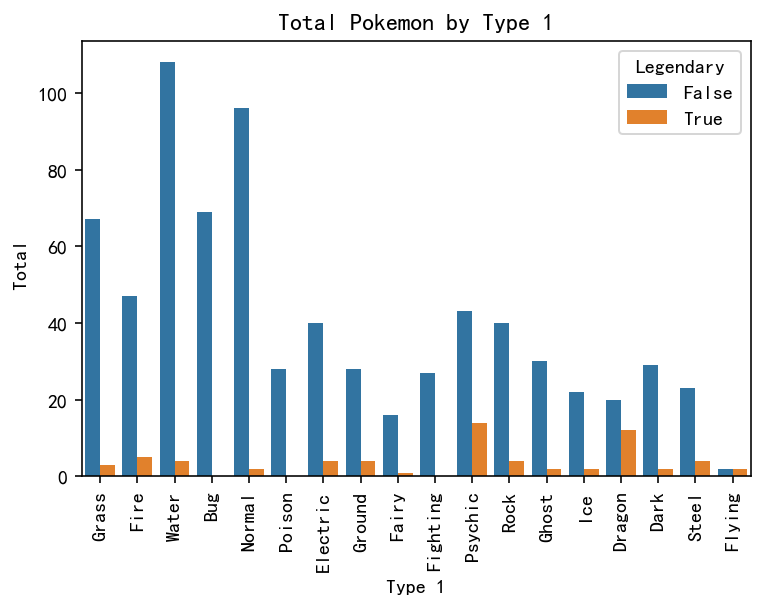

In [16]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation=90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

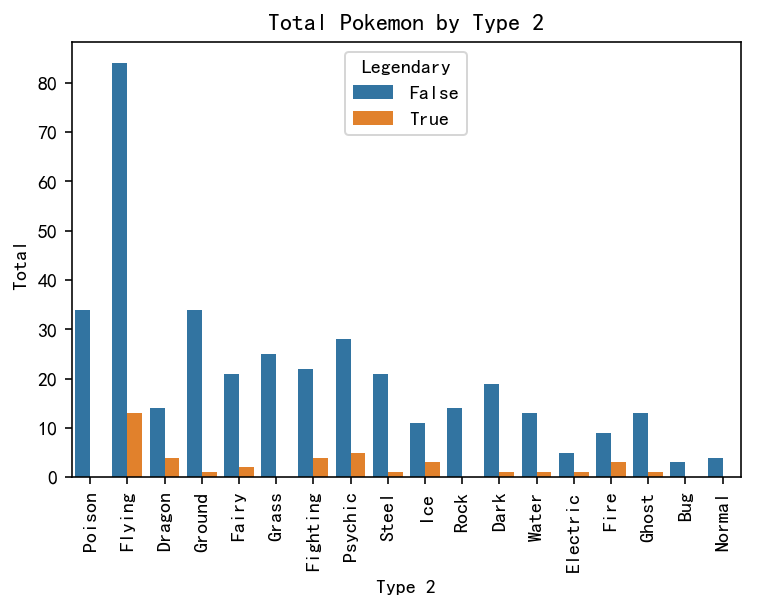

In [17]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation=90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [18]:
results3.groupby('Type 1').agg({
    "Win Percentage": "mean"
}).sort_values(by="Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


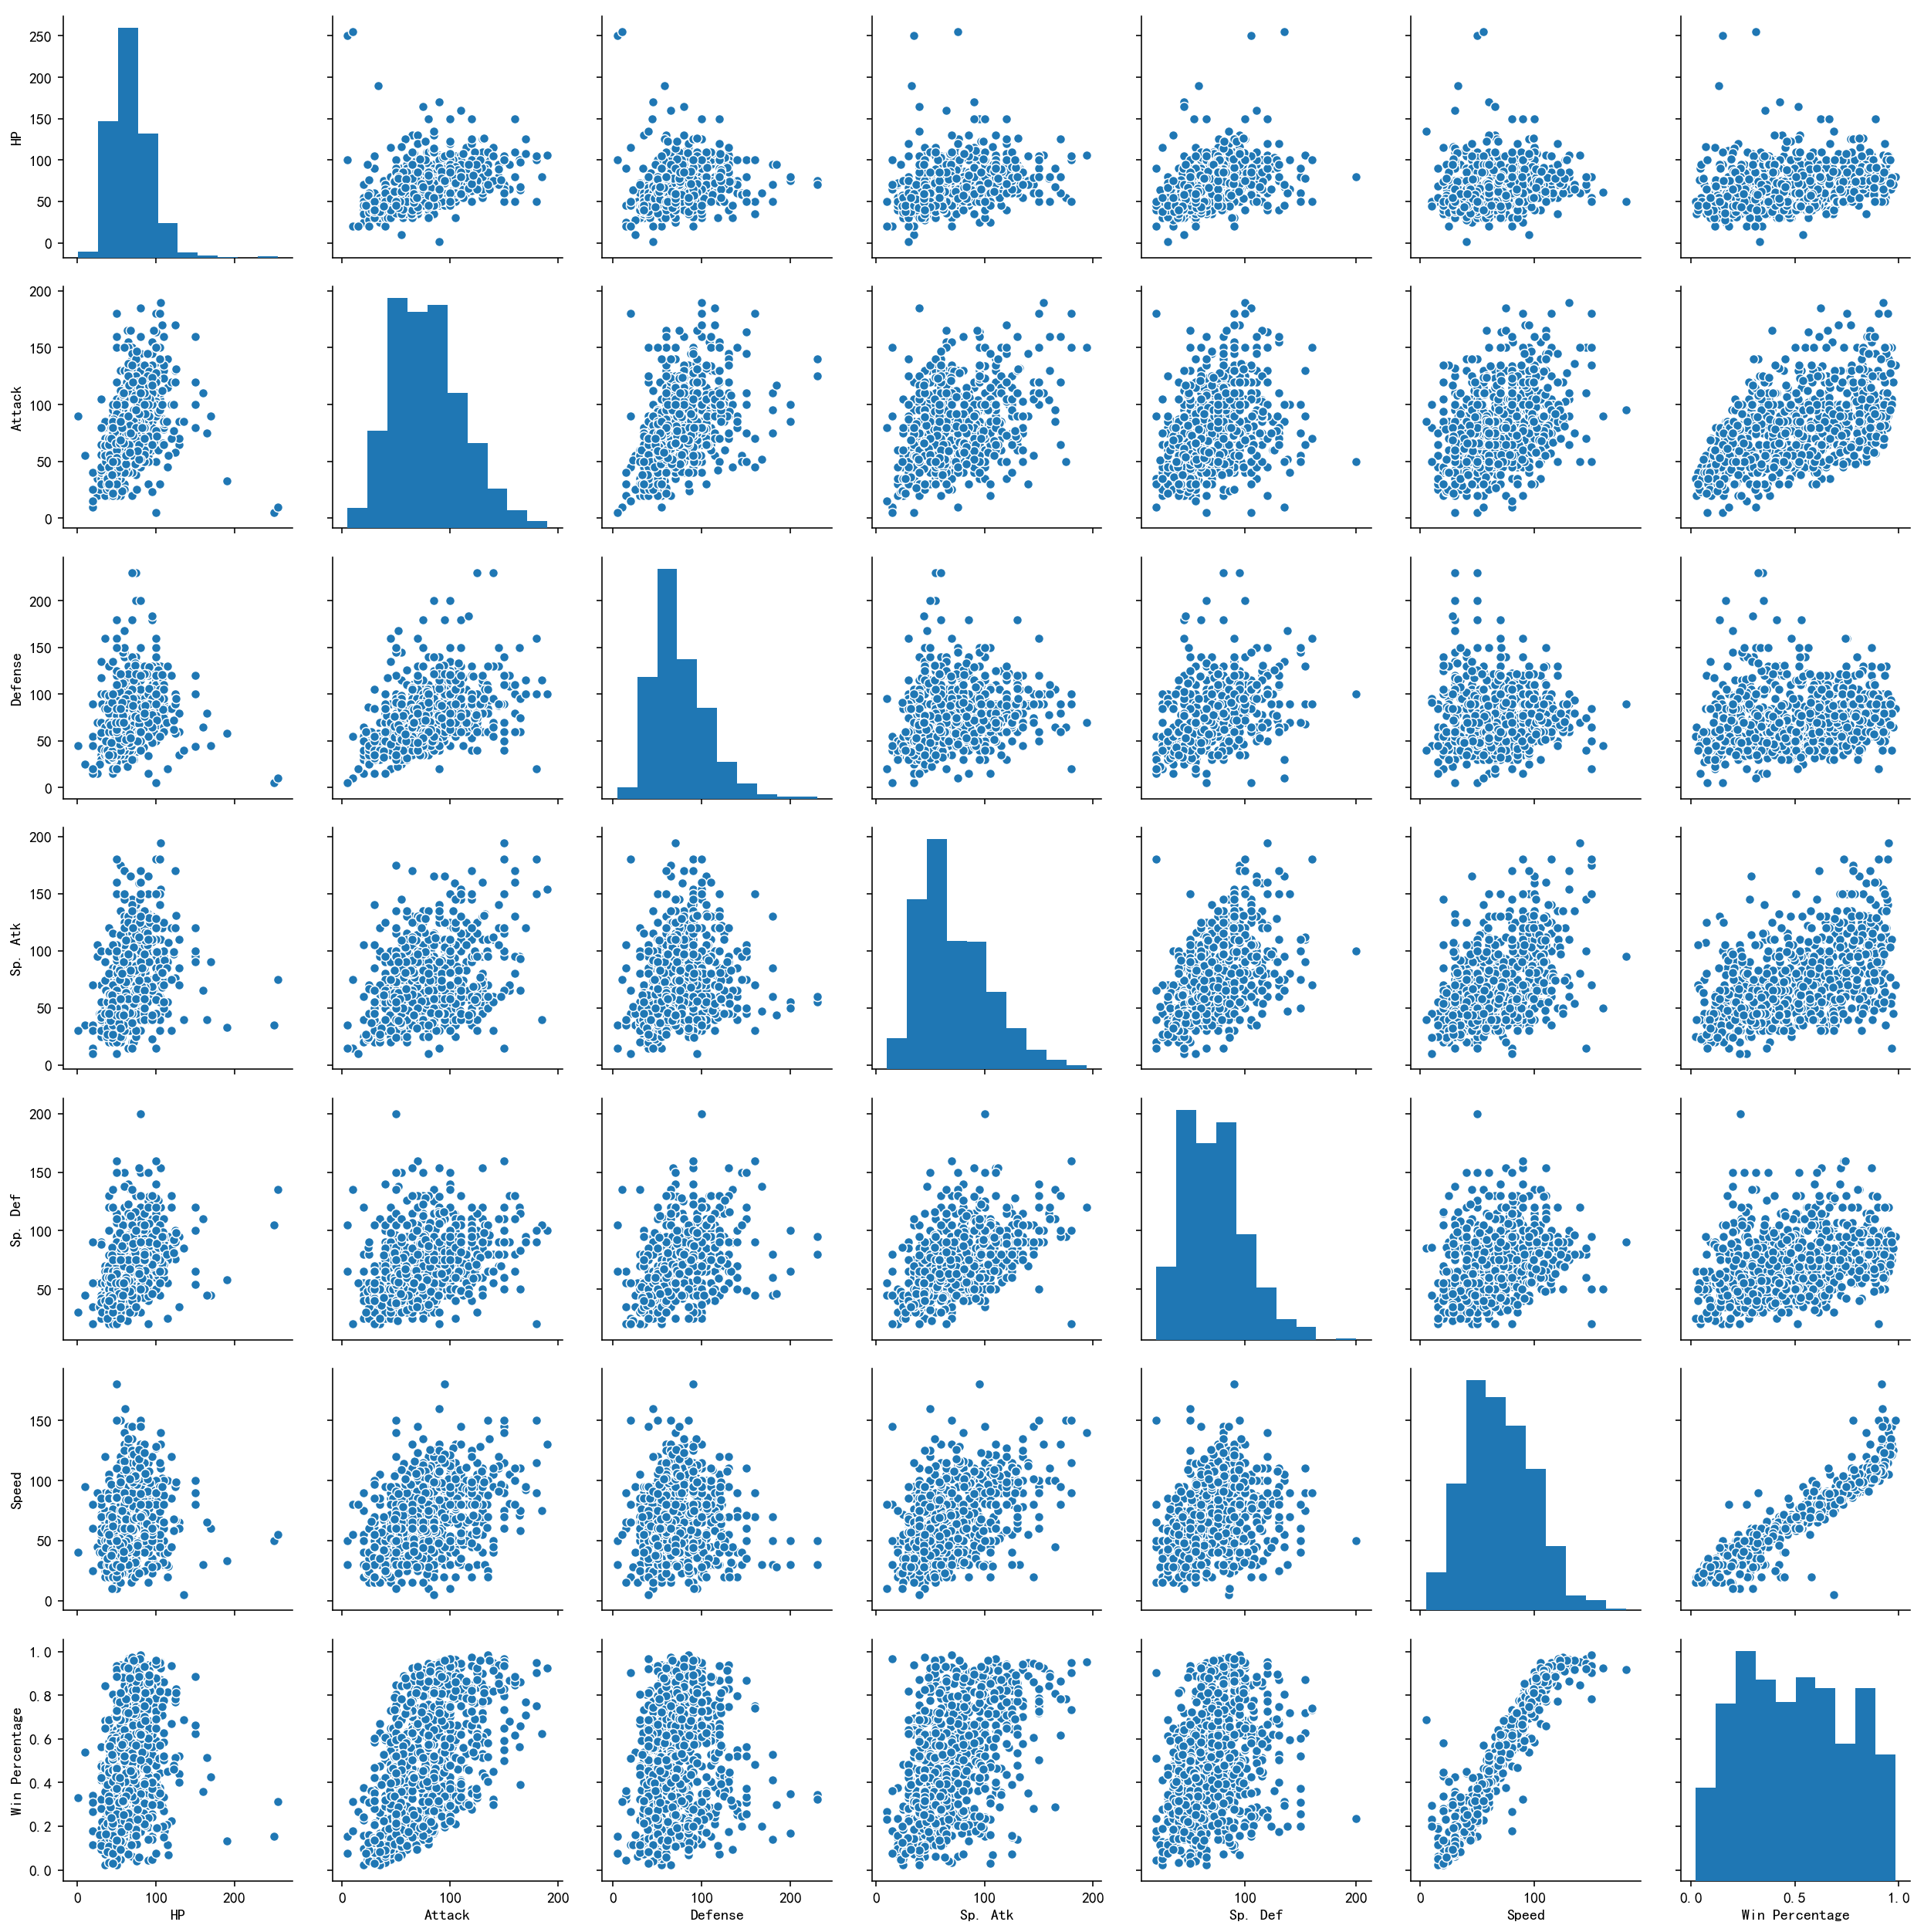

In [19]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = [
    'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
    'Win Percentage'
]
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:, col].dropna())

/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.l

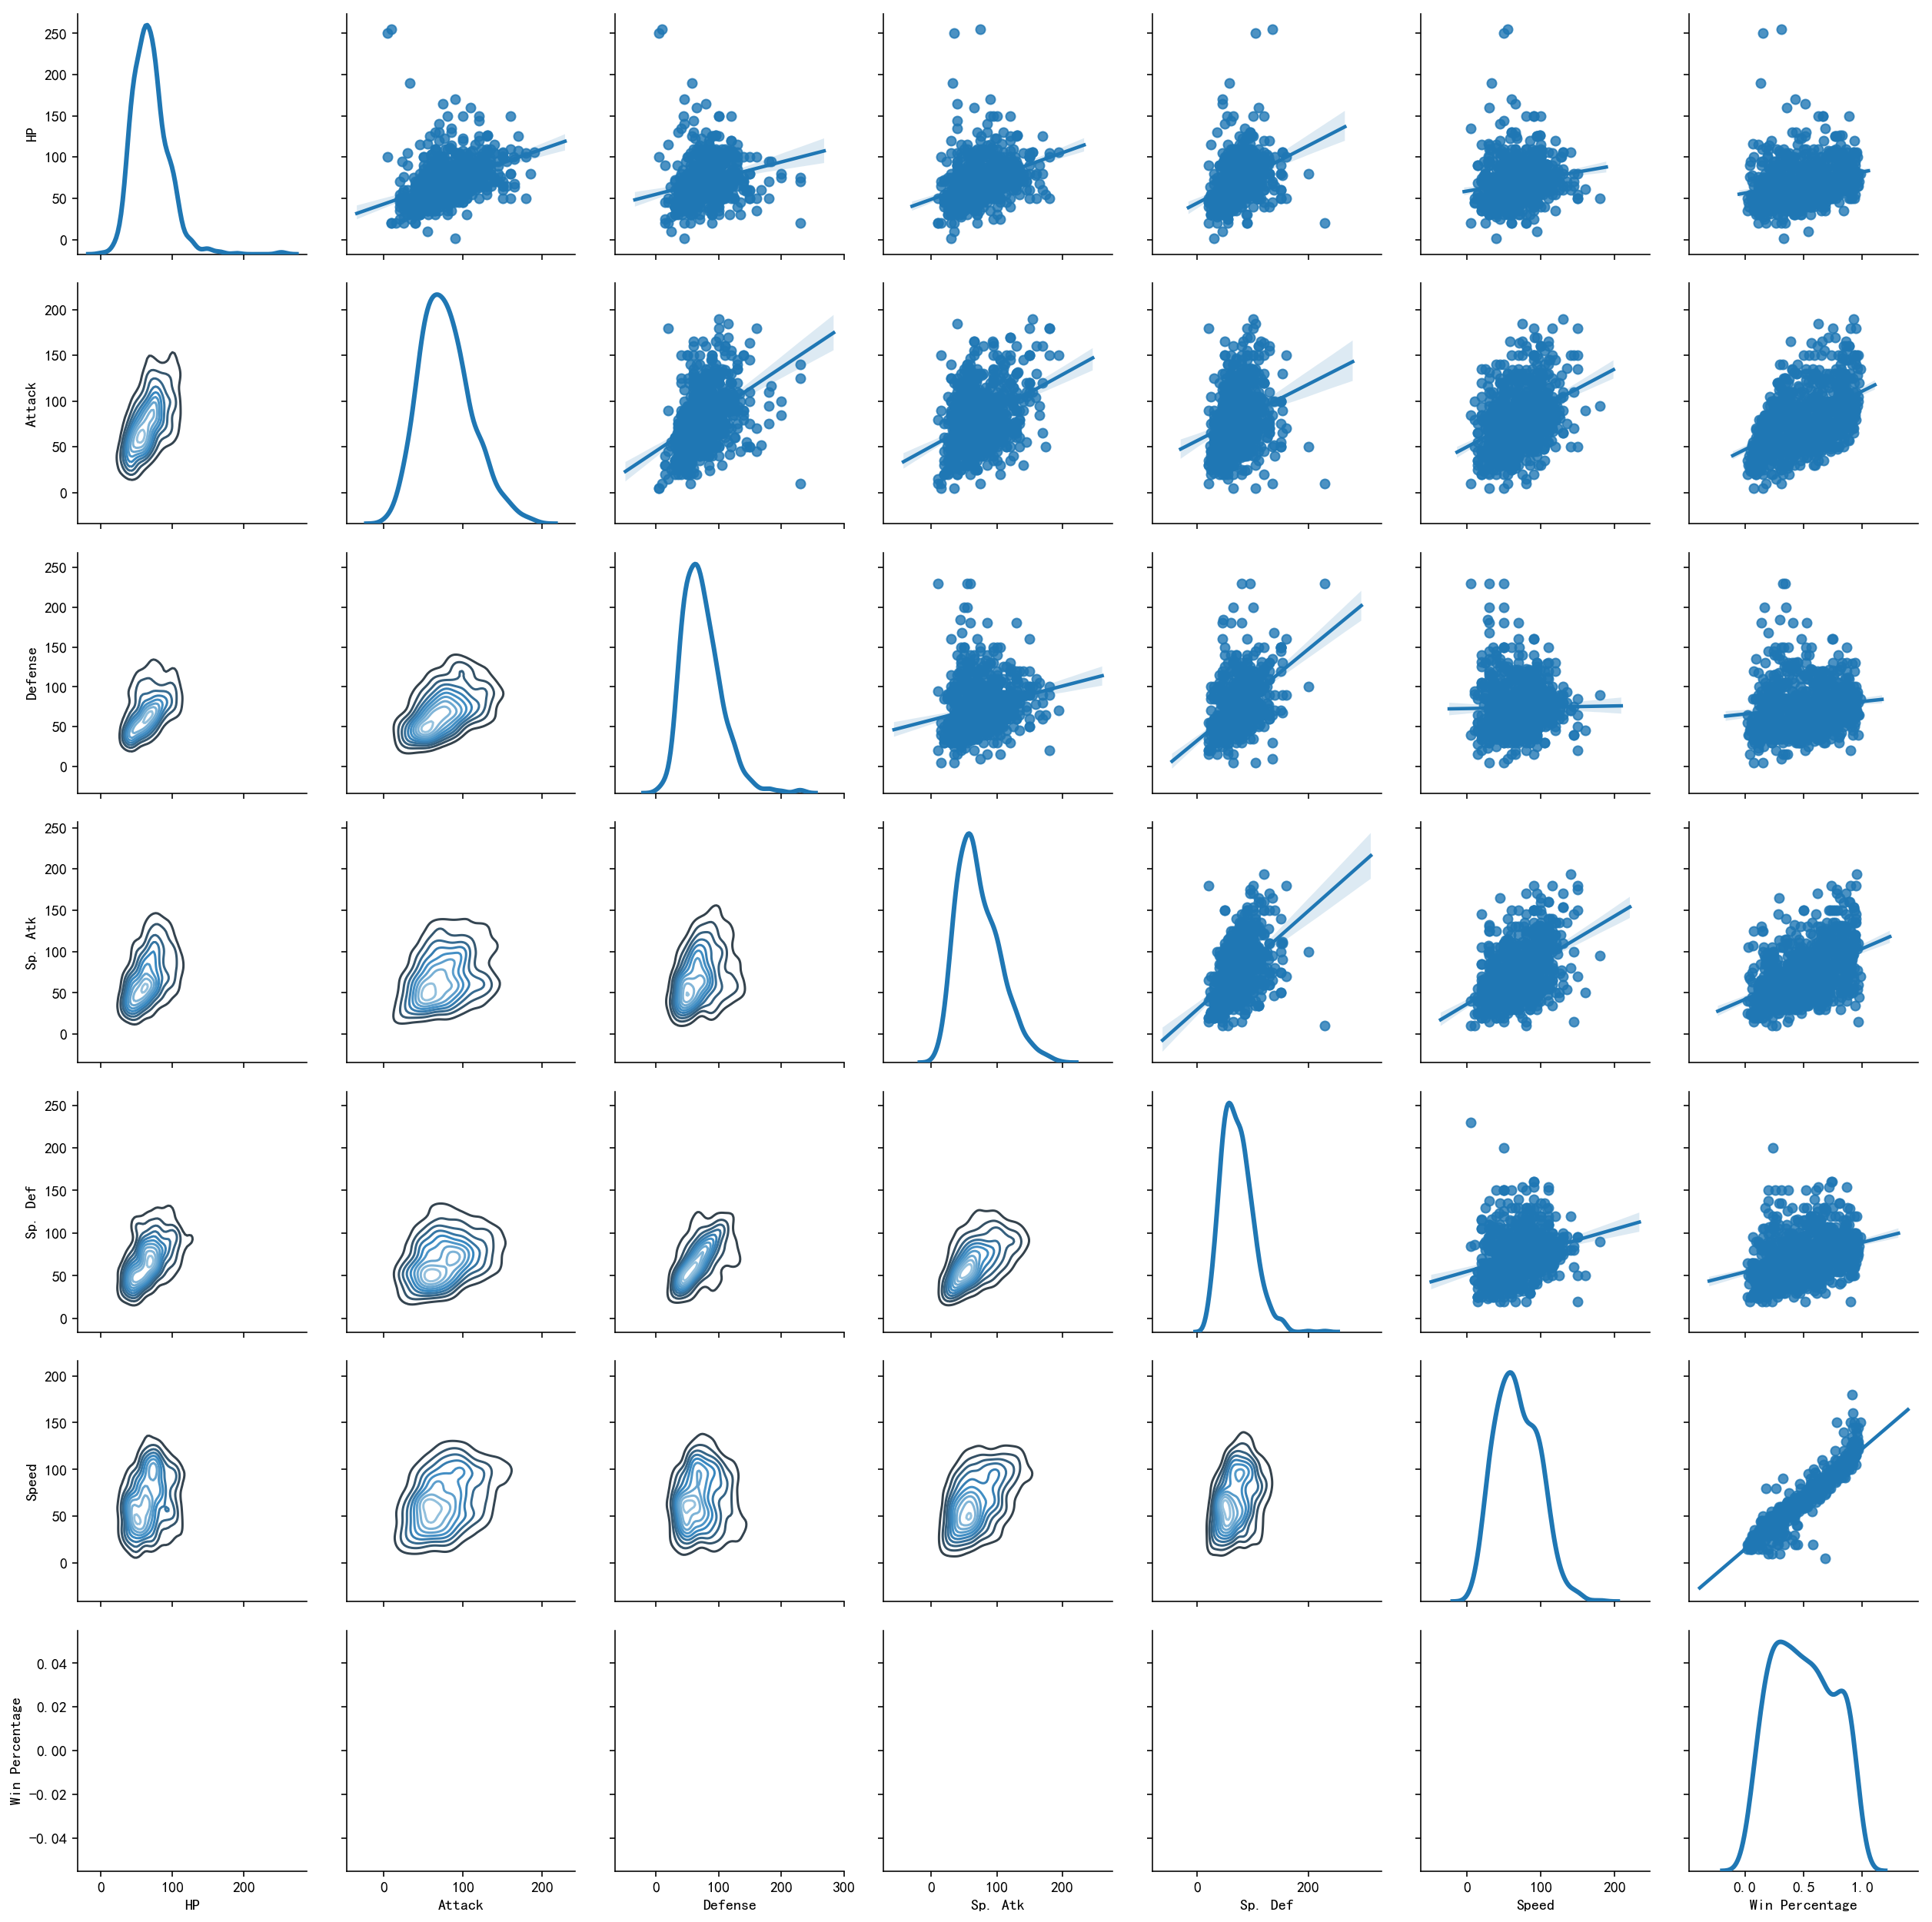

In [20]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:, col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [21]:
results3.loc[:, col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


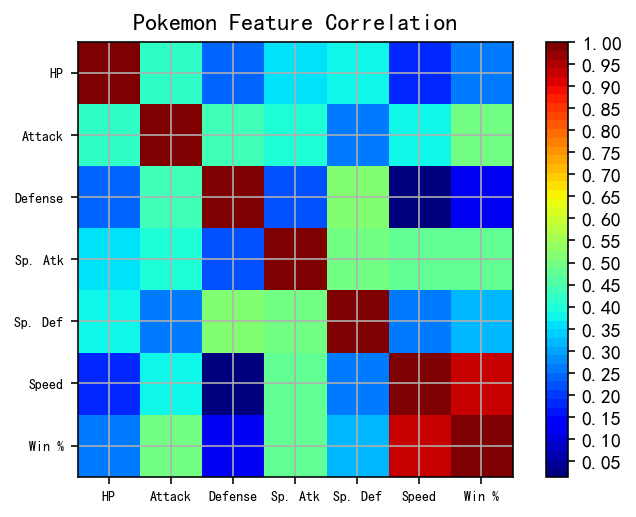

In [22]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = [
        'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
        'Win %'
    ]
    ax1.set_xticklabels(labels, fontsize=7)
    ax1.set_yticklabels(labels, fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(
        cax,
        ticks=[
            0.00, .05, .10, .15, .20, .25, .30, .35, .40, .45, .50, .55, .60,
            .65, .70, .75, .8, .85, .90, .95, 1
        ])
    plt.show()


correlation_matrix(results3.loc[:, col])

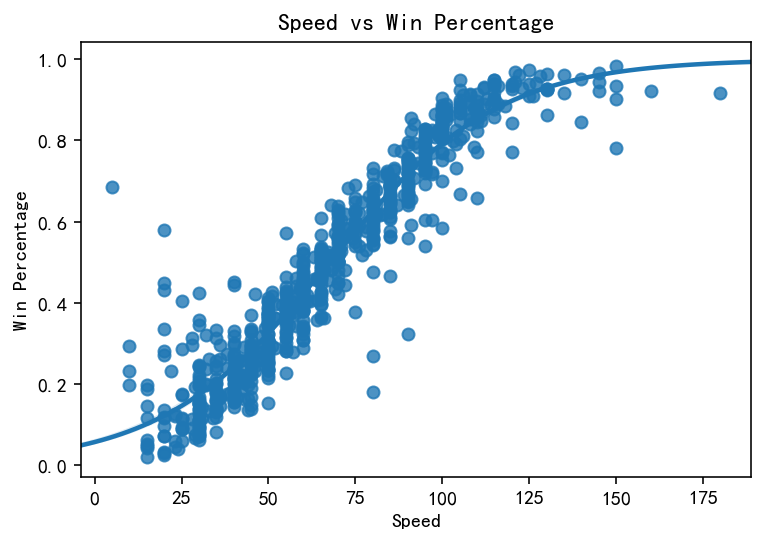

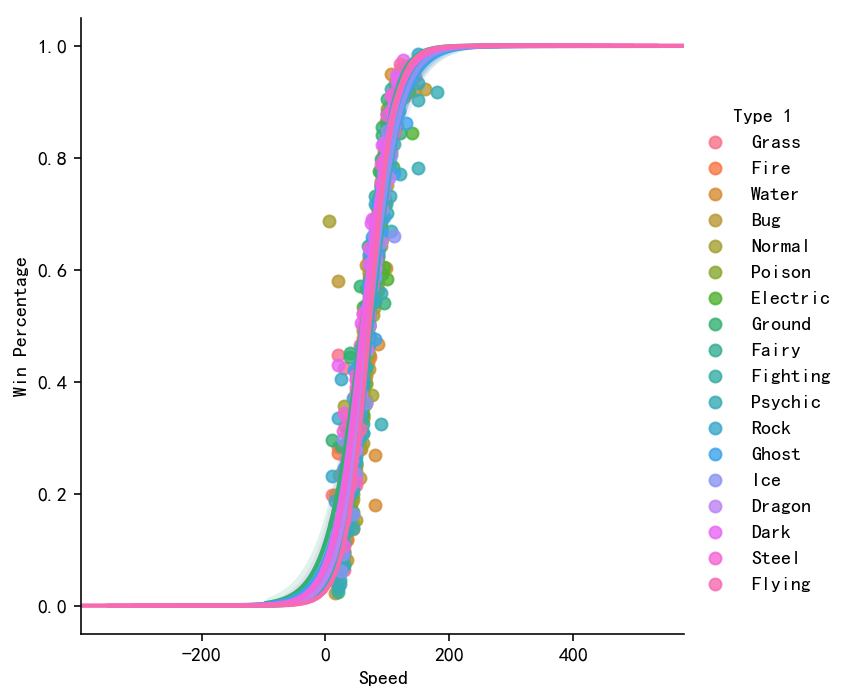

In [23]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(
    x="Speed", y="Win Percentage", data=results3,
    logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(
    x="Speed", y="Win Percentage", data=results3, hue='Type 1',
    logistic=True)  #.set_title("Speed vs Win Percentage")

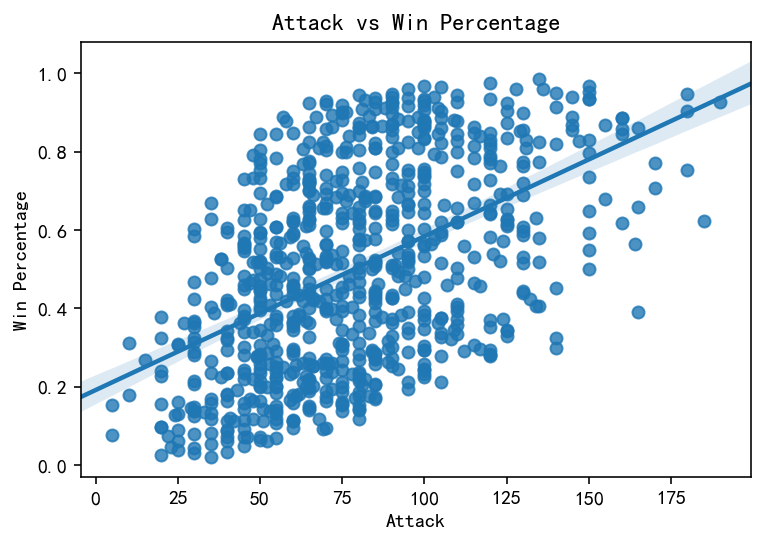

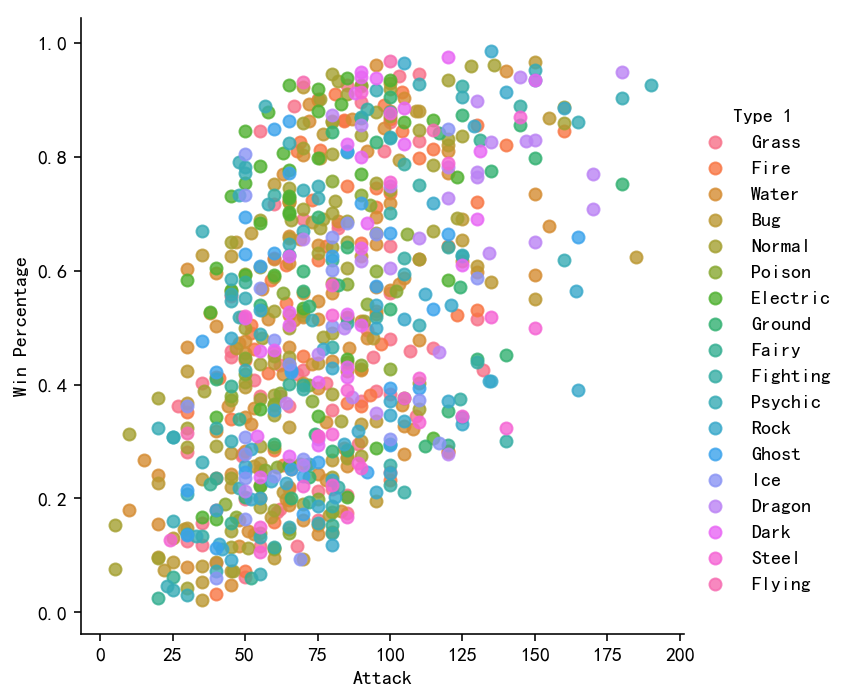

In [24]:
ax = sns.regplot(
    x="Attack", y="Win Percentage",
    data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(
    x="Attack", y="Win Percentage", data=results3, hue='Type 1', fit_reg=False)

In [63]:
dataset = results2

In [64]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,37,37,133,0.278195
1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,46,46,121,0.380165
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,89,89,132,0.674242
3,4.0,Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,70,70,125,0.560000
6,7.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False,115,115,133,0.864662
7,8.0,Mega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,False,119,119,139,0.856115
8,9.0,Mega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False,114,114,135,0.844444
15,16.0,Butterfree,Bug,Flying,60.0,45.0,50.0,90.0,80.0,70.0,1.0,False,75,75,120,0.625000
16,17.0,Weedle,Bug,Poison,40.0,35.0,30.0,20.0,20.0,50.0,1.0,False,26,26,111,0.234234
17,18.0,Kakuna,Bug,Poison,45.0,25.0,50.0,25.0,25.0,35.0,1.0,False,17,17,130,0.130769


In [65]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

In [67]:
dataset.iloc[:, 5:11]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,49.0,49.0,65.0,65.0,45.0,1.0
1,62.0,63.0,80.0,80.0,60.0,1.0
2,82.0,83.0,100.0,100.0,80.0,1.0
3,100.0,123.0,122.0,120.0,80.0,1.0
4,52.0,43.0,60.0,50.0,65.0,1.0
5,64.0,58.0,80.0,65.0,80.0,1.0
6,84.0,78.0,109.0,85.0,100.0,1.0
7,130.0,111.0,130.0,85.0,100.0,1.0
8,104.0,78.0,159.0,115.0,100.0,1.0
9,48.0,65.0,50.0,64.0,43.0,1.0


In [69]:
dataset

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1.0,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,37,37,133,0.278195
1,2.0,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,46,46,121,0.380165
2,3.0,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,89,89,132,0.674242
3,4.0,Mega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,70,70,125,0.560000
4,5.0,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,55,55,112,0.491071
5,6.0,Charmeleon,Fire,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1.0,False,64,64,118,0.542373
6,7.0,Charizard,Fire,Flying,78.0,84.0,78.0,109.0,85.0,100.0,1.0,False,115,115,133,0.864662
7,8.0,Mega Charizard X,Fire,Dragon,78.0,130.0,111.0,130.0,85.0,100.0,1.0,False,119,119,139,0.856115
8,9.0,Mega Charizard Y,Fire,Flying,78.0,104.0,78.0,159.0,115.0,100.0,1.0,False,114,114,135,0.844444
9,10.0,Squirtle,Water,NaN,44.0,48.0,65.0,50.0,64.0,43.0,1.0,False,19,19,117,0.162393


In [68]:
dataset.iloc[:, 15] # Win Percentage 这一列

0      0.278195
1      0.380165
2      0.674242
3      0.560000
4      0.491071
5      0.542373
6      0.864662
7      0.856115
8      0.844444
9      0.162393
10     0.418440
12     0.576389
13     0.147826
14     0.097744
15     0.625000
16     0.234234
17     0.130769
18     0.625000
19     0.966387
20     0.373016
21     0.528926
22     0.861538
23     0.944444
24     0.481481
25     0.721429
26     0.449275
27     0.837398
28     0.366412
29     0.576000
30     0.683824
         ...   
769    0.462121
770    0.401639
771    0.884298
772    0.879032
773    0.257143
774    0.213675
775    0.453846
776    0.603774
777    0.573770
778    0.239130
779    0.393333
780    0.426087
782    0.421488
783    0.251908
784    0.718750
785    0.809917
786    0.572581
787    0.393939
788    0.093023
789    0.297521
790    0.314961
791    0.930435
792    0.829457
793    0.810219
794    0.747664
795    0.371429
796    0.885496
797    0.504202
798    0.618056
799    0.619835
Name: Win Percentage, Le

In [26]:



# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [27]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [28]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae


ml_linearreg(X_train, X_test, y_train, y_test)

0.9076142320040209


0.06143408809230802

In [29]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel='linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred = regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae


ml_svm(X_train, X_test, y_train, y_test)

0.9065078337237095


0.06360099438357145

In [30]:
#feature scaling not needed


def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae


ml_decisiontree(X_train, X_test, y_train, y_test)

0.9997364298486605


0.05381006518627112

In [31]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae


ml_randomforest(X_train, X_test, y_train, y_test)

# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (Random Forest Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

0.9900335696113418


0.04998334826451492

In [32]:
def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(
        n_estimators=100,
        learning_rate=0.08,
        gamma=0,
        subsample=0.75,
        colsample_bytree=1,
        max_depth=7)
    xgb.fit(X_train, y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae


ml_xgboost(X_train, X_test, y_train, y_test)

0.9973088078582824


0.049180133683086116

In [33]:
#store all the ML results in an array
all_stats = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]
#all_stats

0.9076142320040209
0.9065078337237095
0.9997364298486605
0.9900335696113418
0.9973088078582824


In [34]:
#PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

#loadings vectors
#print(pca.components_.T * np.sqrt(pca.explained_variance_))

This is the variance explained by the principle components
[0.41314124 0.17695566 0.16108936]


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
# run PCA transformed data on ML algos
PCA = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

0.7536920624122633
0.7526006202792718
0.99973644025325
0.9602173159076051
0.9845764846202227


In [36]:
# reduce the features to only speed and attack.
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack', 'Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [
    ml_linearreg(X_train, X_test, y_train, y_test),
    ml_svm(X_train, X_test, y_train, y_test),
    ml_decisiontree(X_train, X_test, y_train, y_test),
    ml_randomforest(X_train, X_test, y_train, y_test),
    ml_xgboost(X_train, X_test, y_train, y_test)
]

0.9049921104553327


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9040040161126808
0.9930604360712907
0.9859902601183322
0.9881858154619502


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [37]:
#compare results from the 3 trials
ml_results = pd.DataFrame({
    'All Factors': all_stats,
    'Reduced Factors': reduced_stats,
    'PCA': PCA
})
ml_results.rename(index={
    0: 'Linear',
    1: 'SVM',
    2: 'Decision Tree',
    3: 'Random Forest',
    4: 'XGBoost'
})

,All Factors,Reduced Factors,PCA
Linear,0.061434,0.062812,0.099937
SVM,0.063601,0.064739,0.099990
Decision Tree,0.053810,0.054214,0.127740
Random Forest,0.049983,0.049369,0.096757
XGBoost,0.049180,0.049409,0.094356
